<a href="https://colab.research.google.com/github/sgulyano/aic402/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIC-402 Lab 3: Clustering Methods

CMKL University

By Sarun Gulyanon


### Goal

This lab demonstrates the construction of unsupervised learning models, with a focus on clustering techniques, including K-Means, Gaussian mixture models, DBSCAN and Agglomerative Hierarchical Clustering.


All examples use synthetic datasets generated with the `scikit-learn` library, and the clustering algorithms are  implemented using `scikit-learn`.

### Outline

In this lab, we explore different clustering methods on synthetic datasets with varying characteristics to better understand the strengths and limitations of each approach.


**Reference**: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

----


## 1. Import Package and Module

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

import time

## 2. Create Dataset

We generate **six synthetic datasets** as follows:

- **Donut**: A donut-shaped dataset, representing **non-convex** data.
- **Moons**: A crescent (moon-shaped) dataset, representing **non-convex** data.
- **Varied**: Blob clusters with **different variances**.
- **Aniso**: Blob clusters with **anisotropic distributions** (clusters stretched in different directions).
- **Blobs**: Well-separated **clusters of points**.
- **No Structure**: Data points distributed **uniformly** with no inherent structure.

In [3]:
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

data = [noisy_circles,
        noisy_moons,
        varied,
        aniso,
        blobs,
        no_structure]

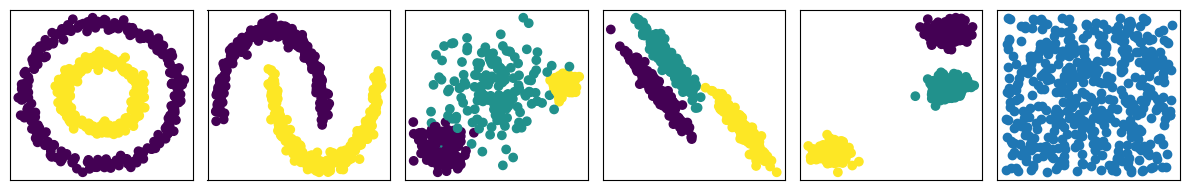

In [4]:
plt.figure(figsize=(12,2))
for i_dataset, dataset in enumerate(data):
    plt.subplot(1,6,i_dataset+1)
    plt.scatter(dataset[0][:,0], dataset[0][:,1], c=dataset[1])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

## 3. Train Unsupervised Learning model

In this section, we explore the following clustering models:
- K-Means Clustering ([`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))
- Gaussian Mixture Model (GMM) ([`GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html))
- DBSCAN ([`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html))
- Agglomerative Hierarchical Clustering ([`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html))

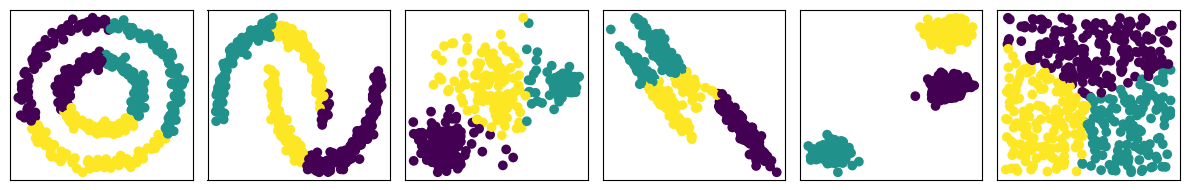

K-Means clustering took 0.63 seconds to run.


In [5]:
#@title K-Means Clustering
n_clusters = 3 #@param {type:"slider", min:2, max:5, step:1}
init_method = 'k-means++' #@param ["k-means++", "random"]

start_time = time.time()

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = cluster.KMeans(n_clusters=n_clusters, n_init="auto", init=init_method).fit(X)
    y_pred = algo.predict(X)

    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"K-Means clustering took {elapsed_time:.2f} seconds to run.")

K-Means is a popular clustering algorithm that partitions data into K clusters by minimizing the distance between data points and their corresponding cluster centroids. It works well only for convex clusters.

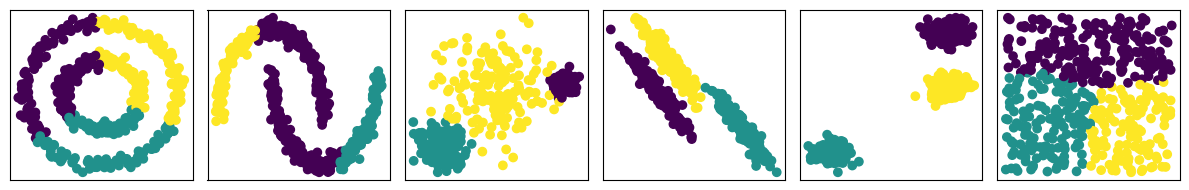

GMM clustering took 2.83 seconds to run.


In [6]:
#@title Gaussian mixture models (GMM)
n_clusters = 3 #@param {type:"slider", min:2, max:5, step:1}
covariance_type = 'full' #@param ["full", "tied", "diag", "spherical"]

start_time = time.time()

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = mixture.GaussianMixture(
            n_components=n_clusters, covariance_type=covariance_type
        ).fit(X)
    y_pred = algo.predict(X)

    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"GMM clustering took {elapsed_time:.2f} seconds to run.")

Gaussian Mixture Model (GMM) is a probabilistic clustering method that models data as a weighted mixture of Gaussian distributions. Unlike K-Means, GMM provides soft cluster assignments, allowing each data point to belong to multiple clusters with different probabilities, and can model clusters with different shapes and sizes. It works well only for convex clusters.

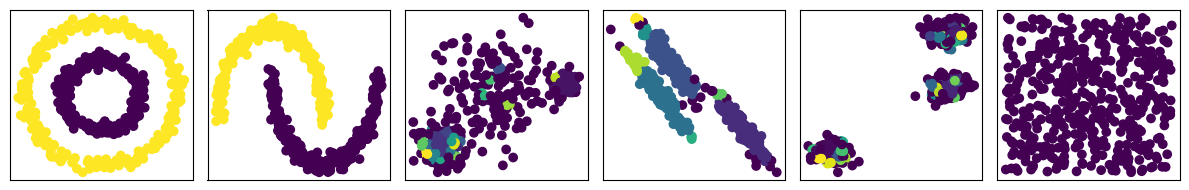

DBSCAN clustering took 0.82 seconds to run.


In [7]:
#@title DBSCAN
eps = 0.25 #@param {type:"slider", min:0.05, max:1, step:0.05}
min_samples = 3 #@param {type:"slider", min:1, max:10, step:1}

start_time = time.time()

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = cluster.DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    y_pred = algo.labels_.astype(int)

    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"DBSCAN clustering took {elapsed_time:.2f} seconds to run.")

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed and marks points in low-density regions as noise (outliers). It can handle non-convex clusters but its performance is sensitive to the choice of hyperparameters.

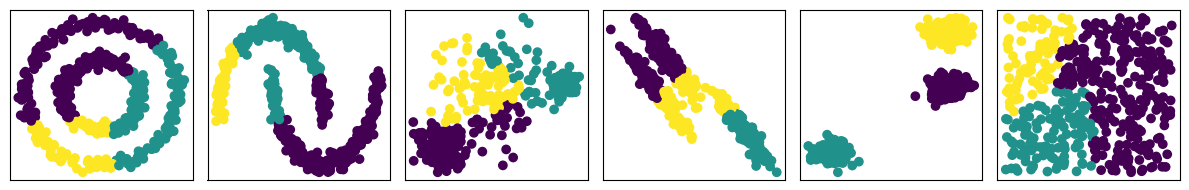

Agglomerative clustering took 0.70 seconds to run.


In [8]:
#@title Agglomerative Clustering
n_clusters = 3 #@param {type:"slider", min:2, max:5, step:1}
linkage = 'complete' #@param ["ward", "complete", "average", "single"]

start_time = time.time()

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = cluster.AgglomerativeClustering(
            linkage=linkage,
            n_clusters=n_clusters,
        ).fit(X)
    y_pred = algo.labels_.astype(int)

    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Agglomerative clustering took {elapsed_time:.2f} seconds to run.")

Agglomerative clustering is a bottom-up hierarchical clustering method that starts with each data point as its own cluster and iteratively merges the closest clusters based on a chosen linkage criterion. It allows easy control of the number of clusters by selecting a cut level in the dendrogram.

# 4. Silhouette Diagram

Selected dataset: blobs


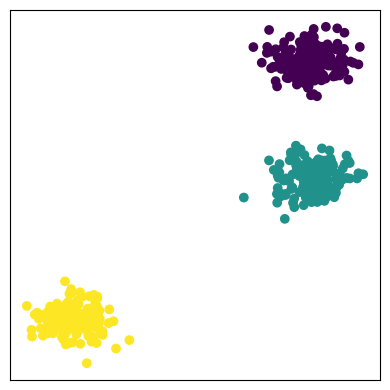

Running KMeans for k=2...
Running KMeans for k=3...
Running KMeans for k=4...
Running KMeans for k=5...
Silhouette Scores for k=2 to 5: [np.float64(0.7851727153851467), np.float64(0.8229367222836427), np.float64(0.6649682642681578), np.float64(0.5170035022351915)]


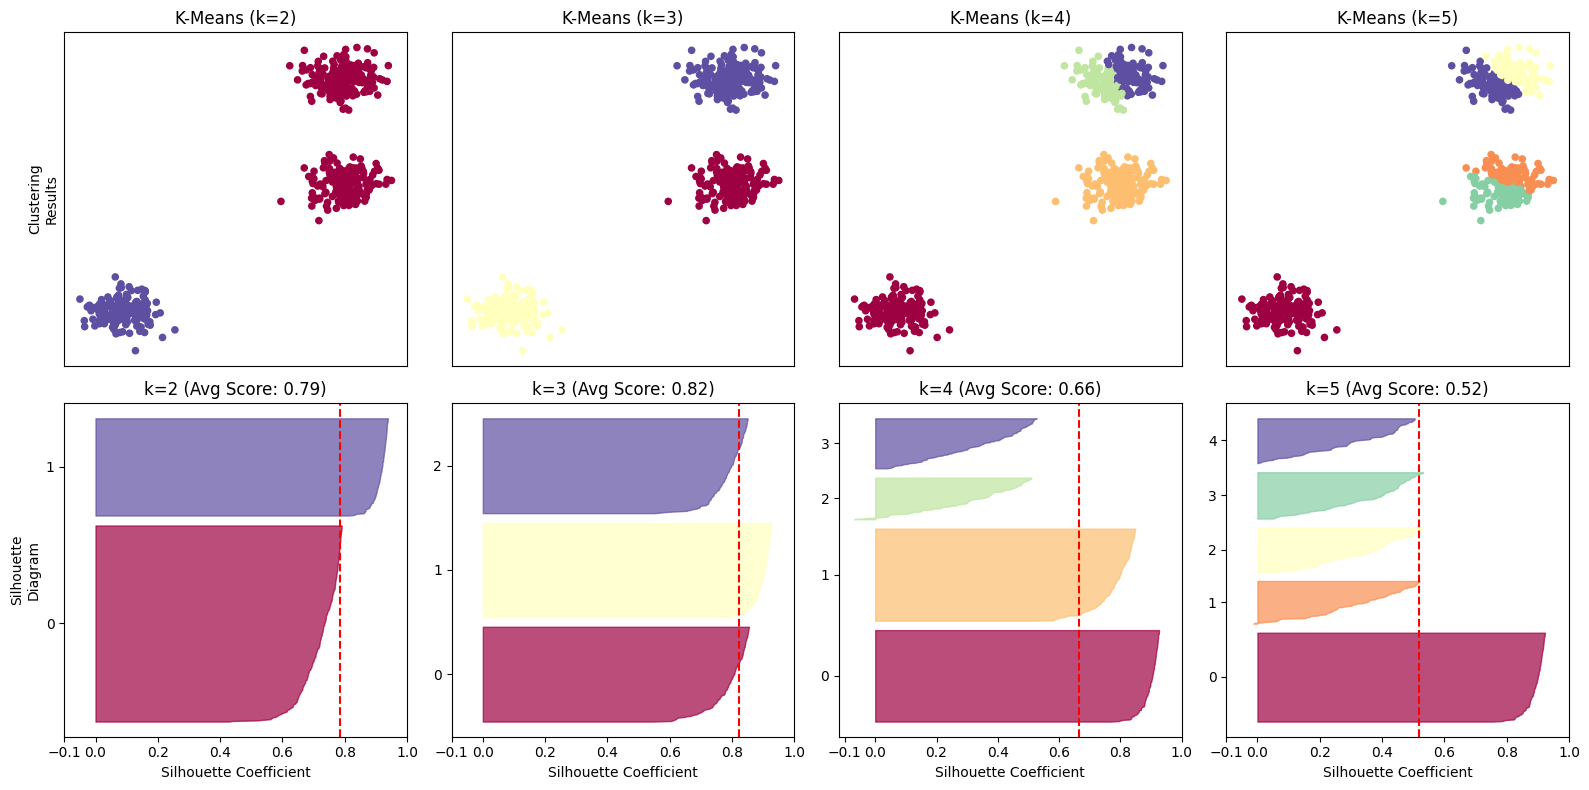


Summary: Based on the silhouette scores, k=3 appears to offer the optimal clustering structure with an average silhouette score of 0.82.


In [17]:
dataset_name = "blobs" #@param ["noisy_circles", "noisy_moons", "varied", "aniso", "blobs", "no_structure"]

# Map dataset name to its index in the 'data' list
dataset_map = {
    "noisy_circles": 0,
    "noisy_moons": 1,
    "varied": 2,
    "aniso": 3,
    "blobs": 4,
    "no_structure": 5
}

# Select the chosen dataset
dataset_index = dataset_map.get(dataset_name, 4)
X, y = data[dataset_index]

print(f"Selected dataset: {dataset_name}")

plt.figure(figsize=(4, 4))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import KMeans

kmeans_per_k = []
silhouette_scores = []

# Perform K-Means clustering for k from 2 to 5
for k in range(2, 6):
    print(f"Running KMeans for k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    kmeans_per_k.append(kmeans)

    y_pred = kmeans.labels_
    score = silhouette_score(X, y_pred)
    silhouette_scores.append(score)

print(f"Silhouette Scores for k=2 to 5: {silhouette_scores}")

plt.figure(figsize=(16, 8))

# Generate plots for clustering results and silhouette diagrams
for idx, k in enumerate(range(2, 6)): # idx: 0,1,2,3 for k: 2,3,4,5
    y_pred = kmeans_per_k[idx].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    # Plot Clustering Results (First Row)
    plt.subplot(2, 4, idx + 1) # Subplot for clustering results (top row)
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='Spectral', s=20) # Added s for point size
    plt.title(f"K-Means (k={k})")
    plt.xticks(())
    plt.yticks(())
    if idx == 0:
        plt.ylabel("Clustering\nResults")

    # Plot Silhouette Diagram (Second Row)
    plt.subplot(2, 4, idx + 1 + 4) # Subplot for silhouette diagram (bottom row)

    # Plotting individual silhouette coefficients
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        # Filter coefficients for the current cluster i
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort() # Sort coefficients for proper plotting

        color = plt.cm.Spectral(float(i) / (k-1)) # Cast to float for division
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # X-axis for silhouette plots
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    if idx == 0:
        plt.ylabel("Silhouette\nDiagram") # Label for the first subplot in the row

    # Plot average silhouette score as a vertical dashed line
    plt.axvline(x=silhouette_scores[idx], color="red", linestyle="--")
    plt.title(f"k={k} (Avg Score: {silhouette_scores[idx]:.2f})")

plt.tight_layout() # Improve subplot spacing
plt.show()

# Summarize the results to identify the optimal k
optimal_k_index = np.argmax(silhouette_scores)
optimal_k = list(range(2, 6))[optimal_k_index] # Convert range to list for indexing
print(f"\nSummary: Based on the silhouette scores, k={optimal_k} appears to offer the optimal clustering structure with an average silhouette score of {silhouette_scores[optimal_k_index]:.2f}.")

## 5. Conclusion and Exercise

Different clustering methods make different assumptions and are suited to different types of data structures. Try experimenting with their hyperparameters to observe how the clustering results change. The key to effective clustering is understanding the data and selecting an appropriate clustering technique.


----